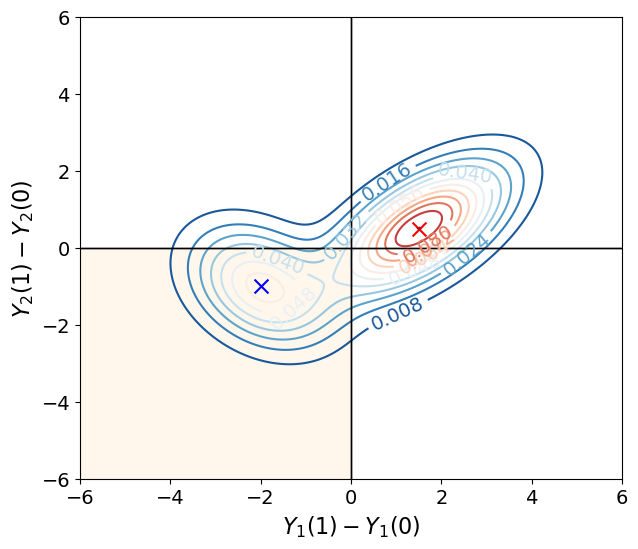

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define two Gaussian modes: one positive, one negative
mean1 = np.array([1.5, 0.5])   # positive average effect
cov1 = np.array([[1.5, 0.8],
                 [0.8, 1.2]])

mean2 = np.array([-2.0, -1.0])  # negative mode
cov2 = np.array([[1.0, -0.3],
                 [-0.3, 1.0]])

# Mixture weights
w1, w2 = 0.65, 0.35
assert np.isclose(w1 + w2, 1.0), "Mixture weights must sum to 1."

# Grid for contour plot
x = np.linspace(-6, 6, 250)
y = np.linspace(-6, 6, 250)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Two-component Gaussian mixture
rv1 = multivariate_normal(mean1, cov1)
rv2 = multivariate_normal(mean2, cov2)
Z = w1 * rv1.pdf(pos) + w2 * rv2.pdf(pos)  # weighted mixture

# Mixture mean (weighted average of component means)
mix_mean = w1 * mean1 + w2 * mean2

# Ensure positive average effect on the first dimension
assert mix_mean[0] > 0, f"Mixture mean on dim 1 is not positive: {mix_mean[0]:.3f}"

# Plot contours with larger fonts
plt.figure(figsize=(7,6))
contours = plt.contour(X, Y, Z, levels=12, cmap="RdBu_r")
plt.clabel(contours, inline=True, fontsize=14)  # larger contour labels

# Shade ONLY the bottom-left quadrant (light transparent orange)
plt.axhspan(-6, 0, xmin=0, xmax=0.5, color="orange", alpha=0.08)

# Axes and markers with larger font
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

# Updated labels
plt.xlabel(r"$Y_1(1) - Y_1(0)$", fontsize=16)
plt.ylabel(r"$Y_2(1) - Y_2(0)$", fontsize=16)  # I assume you meant (1) not (0) twice

# Mode markers
plt.scatter(*mean1, color="red", marker="x", s=100, label="Positive Mode")
plt.scatter(*mean2, color="blue", marker="x", s=100, label="Negative Mode")

# Mixture mean marker
#plt.scatter(*mix_mean, color="green", s=120, marker="*", label=f"Mixture Mean ({mix_mean[0]:.2f}, {mix_mean[1]:.2f})")

#plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("jointdist.png", bbox_inches = "tight")
plt.show()

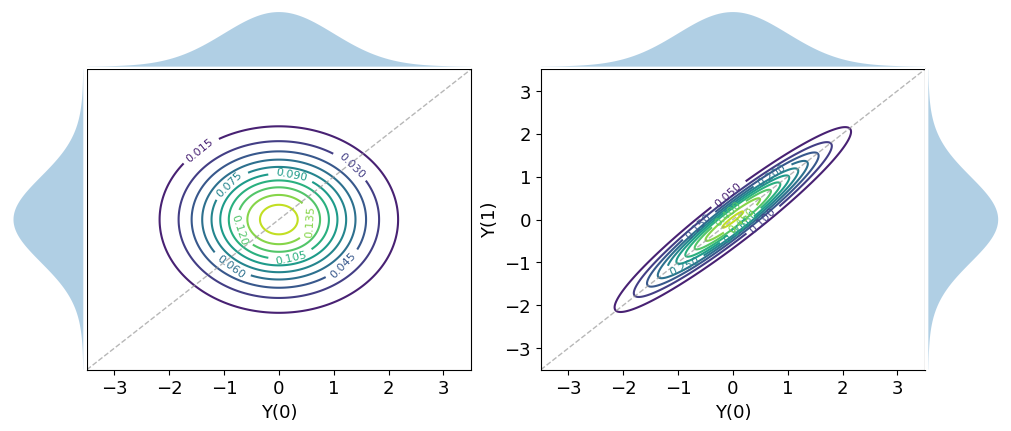

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import multivariate_normal, norm

# --- two couplings with the SAME Gaussian marginals ---
mu = np.array([0.0, 0.0])
sx, sy = 1.0, 1.0
Sigma_ind = np.array([[sx**2, 0.0],
                      [0.0   , sy**2]])        # independent
rho = 0.95
Sigma_dep = np.array([[sx**2, rho*sx*sy],
                      [rho*sx*sy, sy**2]])     # nearly perfectly dependent

def contours(ax, mean, cov, levels=10):
    x = np.linspace(-3.5, 3.5, 300)
    y = np.linspace(-3.5, 3.5, 300)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    Z = multivariate_normal(mean, cov).pdf(pos)
    cs = ax.contour(X, Y, Z, levels=levels, cmap="viridis")
    ax.clabel(cs, fmt="%.3f", inline=True, fontsize=8)
    # reference diagonal
    ax.plot(x, x, ls="--", c="0.6", lw=1, alpha=0.7)
    ax.set_xlim(-3.5, 3.5)
    ax.set_ylim(-3.5, 3.5)
    ax.set_xlabel("Y(0)")
    ax.set_ylabel("Y(1)")
    return x, y

def add_marginals_left(ax_joint):
    """Top marginal (x) and LEFT marginal (y) that hugs the joint plot."""
    div = make_axes_locatable(ax_joint)
    ax_top  = div.append_axes("top",  size="20%", pad=0, sharex=ax_joint)
    ax_left = div.append_axes("left", size="20%", pad=0, sharey=ax_joint)

    # Common cosmetics
    for a in (ax_top, ax_left):
        a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for s in a.spines.values(): s.set_visible(False)

    # top (x) marginal: true N(0, sx)
    x = np.linspace(-3.5, 3.5, 600)
    fx = norm(loc=0, scale=sx).pdf(x)
    ax_top.fill_between(x, 0, fx, alpha=0.35, linewidth=0)  # linewidth=0 removes the thin line

    # left (y) marginal: true N(0, sy). Plot horizontally & flip x so it hugs.
    y = np.linspace(-3.5, 3.5, 600)
    fy = norm(loc=0, scale=sy).pdf(y)
    ax_left.fill_betweenx(y, 0, fy, alpha=0.35, linewidth=0)
    ax_left.invert_xaxis()   # key: hug the joint plot
    #ax_left.set_aspect("equal", adjustable="box")

def add_marginals_right(ax_joint):
    """Top marginal (x) and RIGHT marginal (y) that hugs the joint plot."""
    div = make_axes_locatable(ax_joint)
    ax_top   = div.append_axes("top",   size="20%", pad=0, sharex=ax_joint)
    ax_right = div.append_axes("right", size="20%", pad=0, sharey=ax_joint)

    for a in (ax_top, ax_right):
        a.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
        for s in a.spines.values(): s.set_visible(False)

    x = np.linspace(-3.5, 3.5, 600)
    fx = norm(loc=0, scale=sx).pdf(x)
    ax_top.fill_between(x, 0, fx, alpha=0.35, linewidth=0)

    y = np.linspace(-3.5, 3.5, 600)
    fy = norm(loc=0, scale=sy).pdf(y)
    ax_right.fill_betweenx(y, 0, fy, alpha=0.35, linewidth=0)
    # No inversion here—right marginal is already hugging

    #ax_right.set_aspect("equal", adjustable="box")
# ---- figure ----
fig, (axL, axR) = plt.subplots(1, 2, figsize=(10, 4.2), constrained_layout=True)

# Left: independent
contours(axL, mu, Sigma_ind)
add_marginals_left(axL)

# Right: strongly dependent
contours(axR, mu, Sigma_dep)
add_marginals_right(axR)



plt.savefig("coupling.png",bbox_inches= "tight")
plt.show()

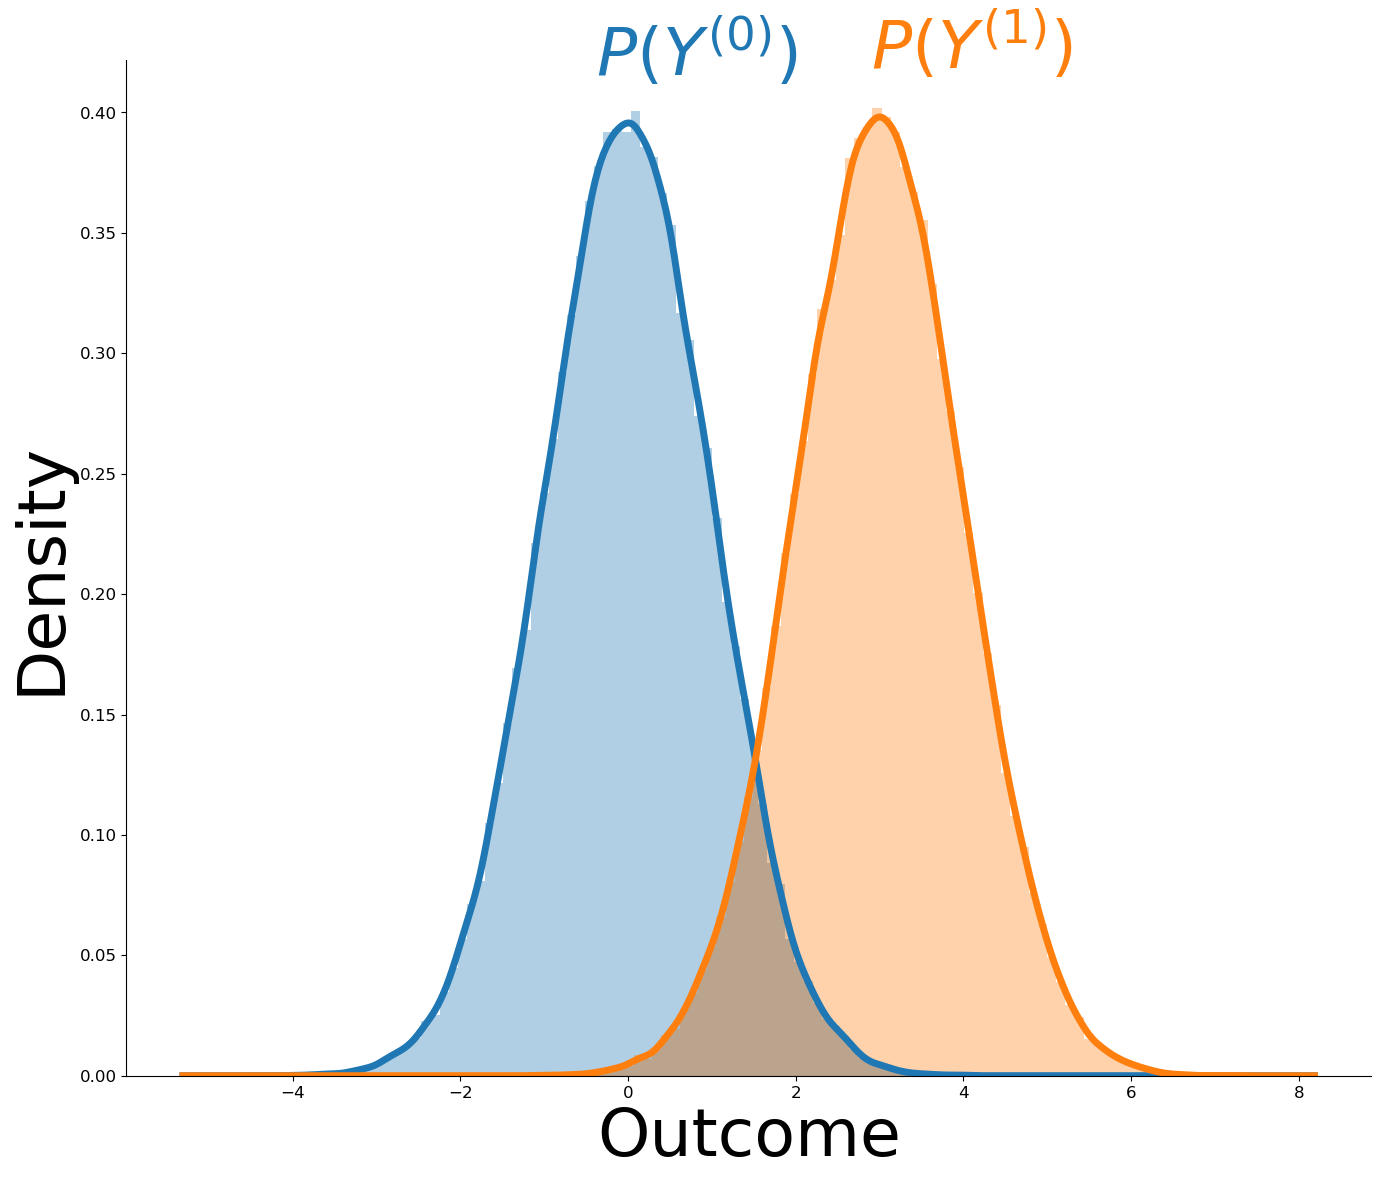

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# ---- simulate data (replace with your arrays if you have them) ----
rng = np.random.default_rng(3)
n  = 100_000
Y0 = rng.normal(loc=0, scale=1.0, size=n)   # P(Y^(0))
Y1 = rng.normal(loc=3, scale=1.0, size=n)   # P(Y^(1))

# ---- KDEs for smooth curves & overlap shading ----
xs = np.linspace(min(Y0.min(), Y1.min()) - 1.0,
                 max(Y0.max(), Y1.max()) + 1.0, 800)
k0 = gaussian_kde(Y0)
k1 = gaussian_kde(Y1)
d0 = k0(xs)
d1 = k1(xs)

# ---- plot ----
fig, ax = plt.subplots(figsize=(14, 12))

# Histograms (density-scaled) with soft fill
bins = 80
ax.hist(Y0, bins=bins, density=True, alpha=0.35, color="#1f77b4",
        edgecolor="none", label=r"$P(Y^{(0)})$")
ax.hist(Y1, bins=bins, density=True, alpha=0.35, color="#ff7f0e",
        edgecolor="none", label=r"$P(Y^{(1)})$")

# KDE curves on top
ax.plot(xs, d0, lw=5, color="#1f77b4")
ax.plot(xs, d1, lw=5, color="#ff7f0e")

# Shade overlap region
ax.fill_between(xs, np.minimum(d0, d1), 0, color="k", alpha=0.08)

# Nicely placed labels near density peaks
x0 = xs[np.argmax(d0)]
y0 = d0.max()
x1 = xs[np.argmax(d1)]
y1 = d1.max()
ax.text(x0 - 0.4, y0 * 1.05, r"$P(Y^{(0)})$", color="#1f77b4",
        fontsize=48, fontstyle="italic")
ax.text(x1 - 0.1, y1 * 1.05, r"$P(Y^{(1)})$", color="#ff7f0e",
        fontsize=48, fontstyle="italic")

# Cosmetics
ax.set_xlabel("Outcome", fontsize=48)
ax.set_ylabel("Density", fontsize=48)
ax.set_ylim(bottom=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(labelsize=12)
#ax.legend(frameon=False, fontsize=48, loc="upper right")

plt.tight_layout()
plt.savefig("gaussians.png", bbox_inches = "tight")
plt.show()

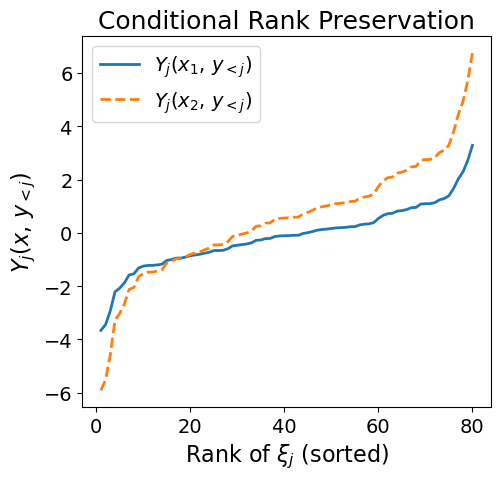

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
rng = np.random.default_rng(7)

# Sample noise and sort to get rank order
n = 80
xi_sorted = np.sort(rng.uniform(0, 1, size=n))
ranks = np.arange(1, n+1)

# Fix y_{<j}
y_less_j_fixed = 0.4

# Strictly increasing base map
def g(u):
    return np.log(u/(1-u))

# Two interventions
x1, x2 = -0.5, 0.8

# Linear scale/shift terms depending on x and y_{<j}
def a(x, y_less):
    return 0.5 * x + 0.3 * y_less

def b(x, y_less):
    return 0.8 + 0.4 * (x + 0.2 * y_less)

# Per-layer monotone map
def Y_j(x, y_less, xi_j):
    return a(x, y_less) + np.maximum(1e-3, b(x, y_less)) * g(xi_j)

y_x1 = Y_j(x1, y_less_j_fixed, xi_sorted)
y_x2 = Y_j(x2, y_less_j_fixed, xi_sorted)

# Plot
plt.figure(figsize=(5.2, 5.0))  # more square
plt.plot(ranks, y_x1, label=r"$Y_j(x_1,\, y_{<j})$", linewidth=2)
plt.plot(ranks, y_x2, label=r"$Y_j(x_2,\, y_{<j})$", linewidth=2, linestyle="--")

plt.xlabel(r"Rank of $\xi_j$ (sorted)", fontsize=16)
plt.ylabel(r"$Y_j(x,\, y_{<j})$", fontsize=16)
plt.title(r"Conditional Rank Preservation", fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("rankpres.png", bbox_inches = "tight")
plt.show()
